In [203]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects  as so
import seaborn as sns
import plotly.express as px
import scipy as sp
import missingno as msno
import sweetviz as sv

In [4]:
df = pd.read_csv("D:\\shopping_trends.csv")
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [163]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

<Axes: >

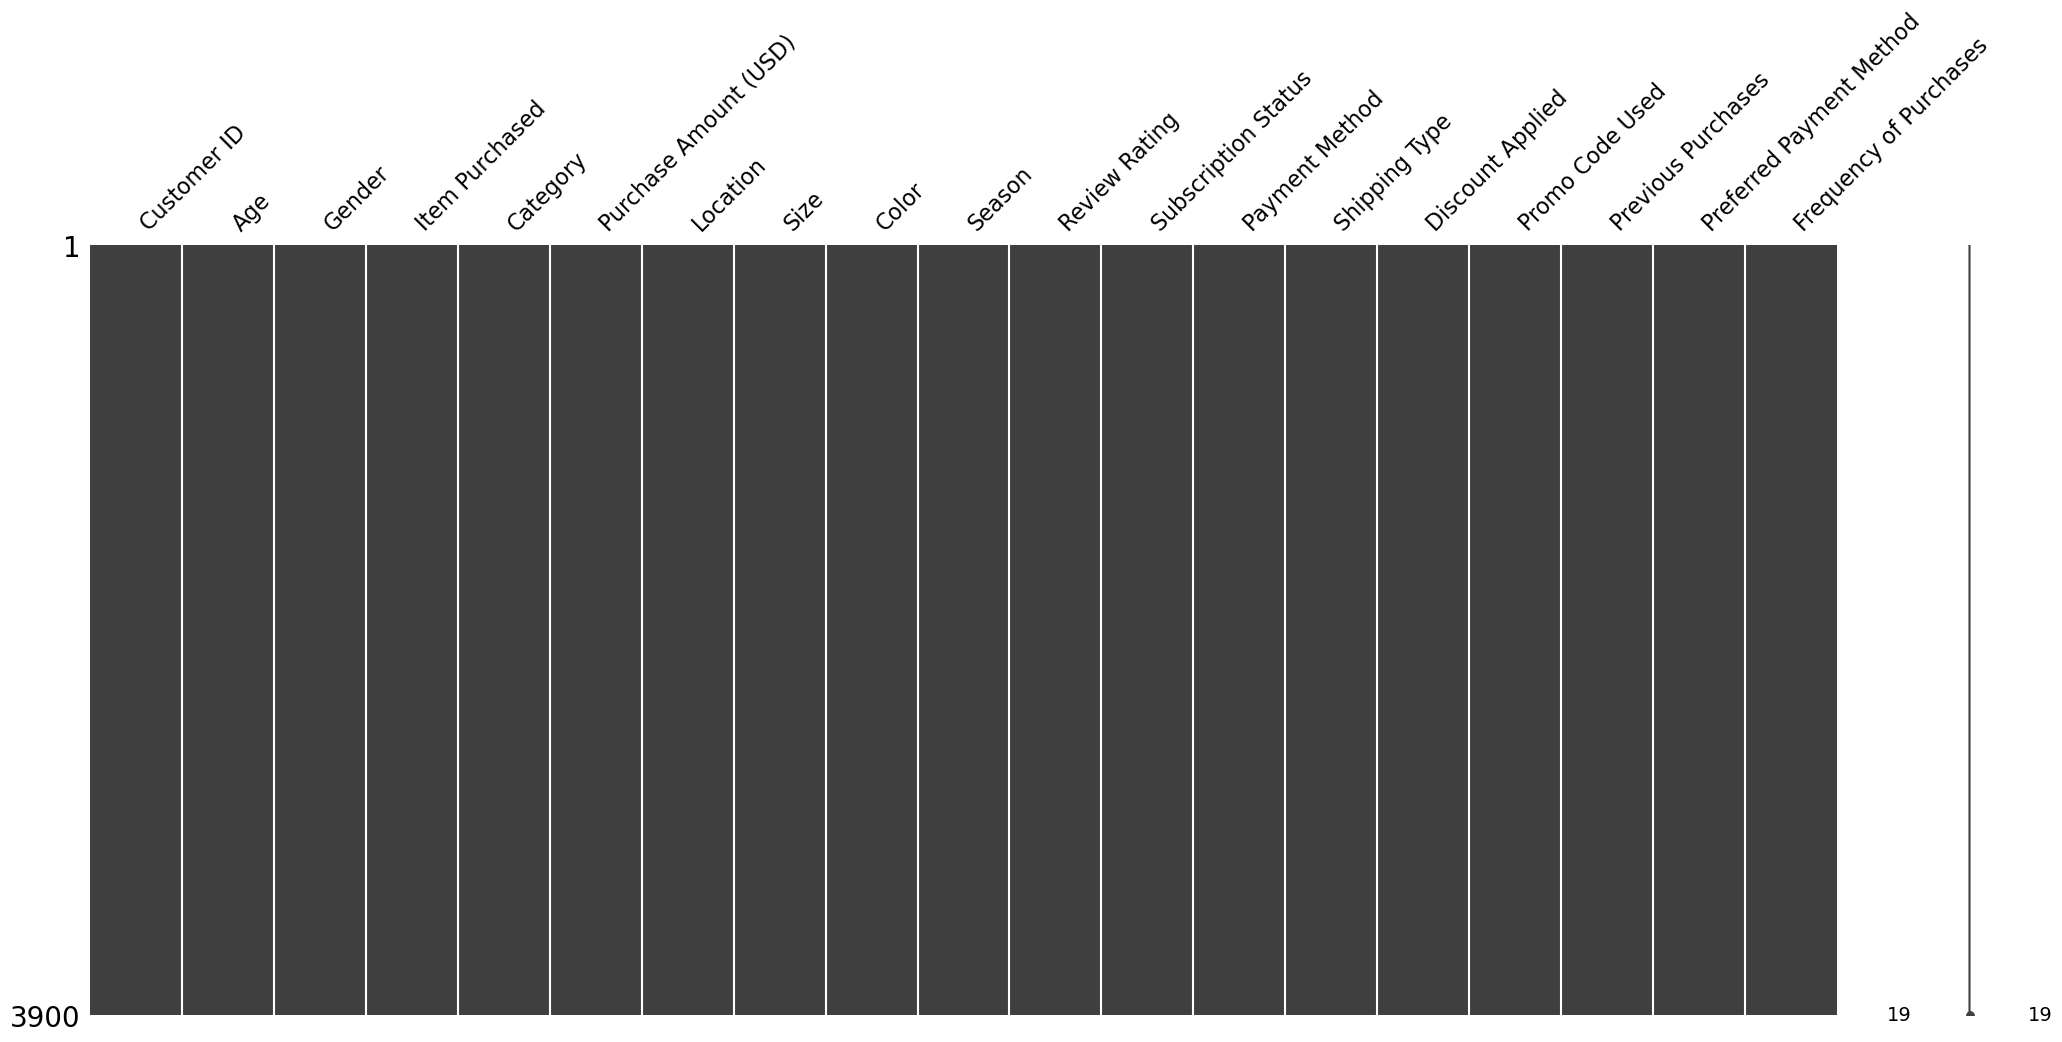

In [175]:
df.info()
df.describe()
msno.matrix(df)

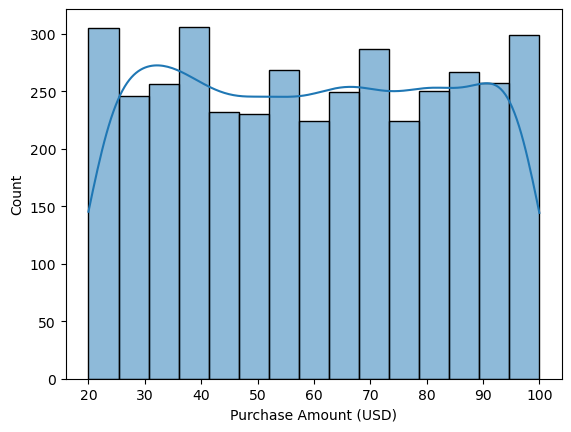

In [23]:
sns.histplot(df['Purchase Amount (USD)'], kde=True)
plt.show()

In [89]:
continous_values = df.select_dtypes(include=["int64","float64"])
continous_values = continous_values.drop("Customer ID",axis =1)
continous_values

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31
...,...,...,...,...
3895,40,28,4.2,32
3896,52,49,4.5,41
3897,46,33,2.9,24
3898,44,77,3.8,24


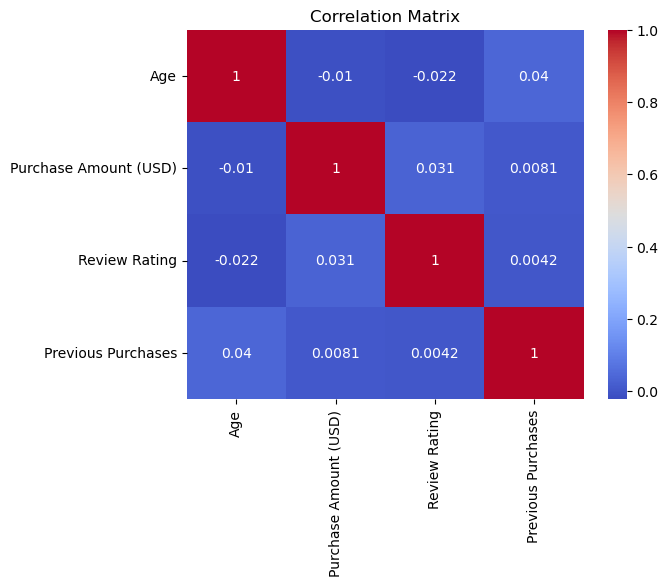

In [157]:
sns.heatmap(continous_values.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [187]:
report = sv.analyze(df)
report.show_html("report.html")

                                             |                                             | [  0%]   00:00 ->…

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: xlabel='Age', ylabel='Count'>

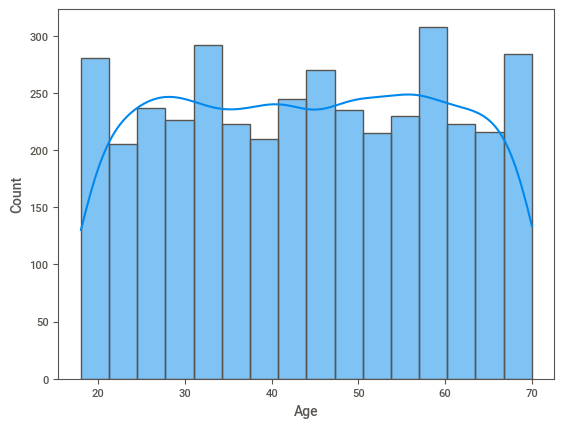

In [215]:
sns.histplot(df.Age,kde = True)

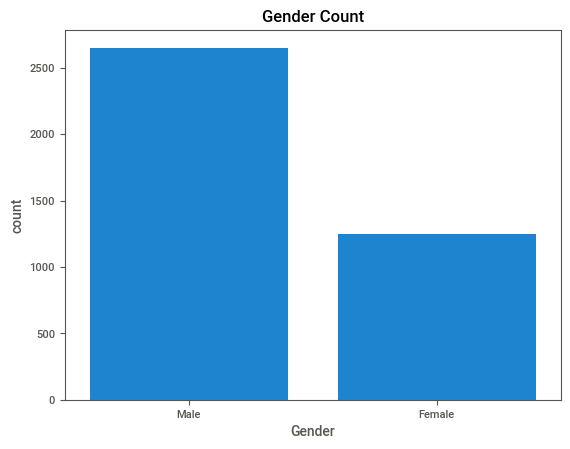

In [221]:
sns.countplot(data=df, x="Gender")
plt.title("Gender Count")
plt.show()

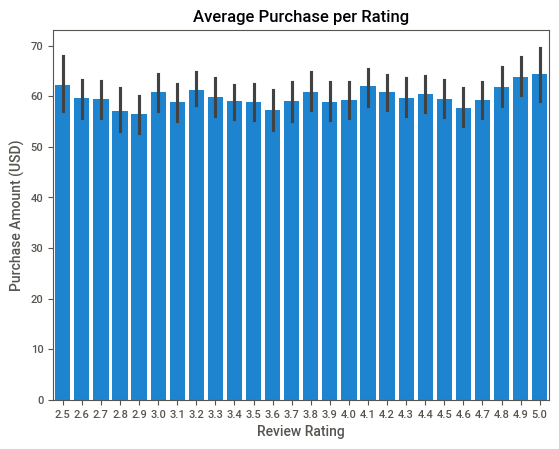

In [231]:
sns.barplot(data=df, x="Review Rating", y="Purchase Amount (USD)")
plt.title("Average Purchase per Rating")
plt.show()

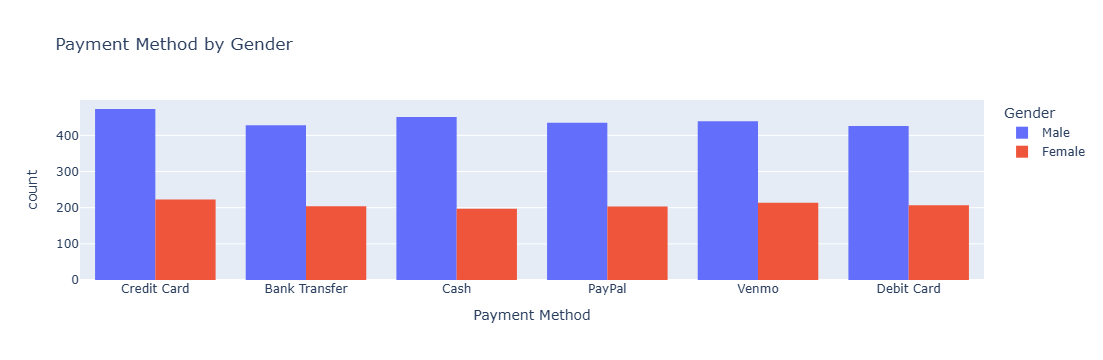

In [247]:
fig = px.histogram(df,x="Payment Method",color="Gender",barmode="group",title="Payment Method by Gender")
fig.show()
xmax

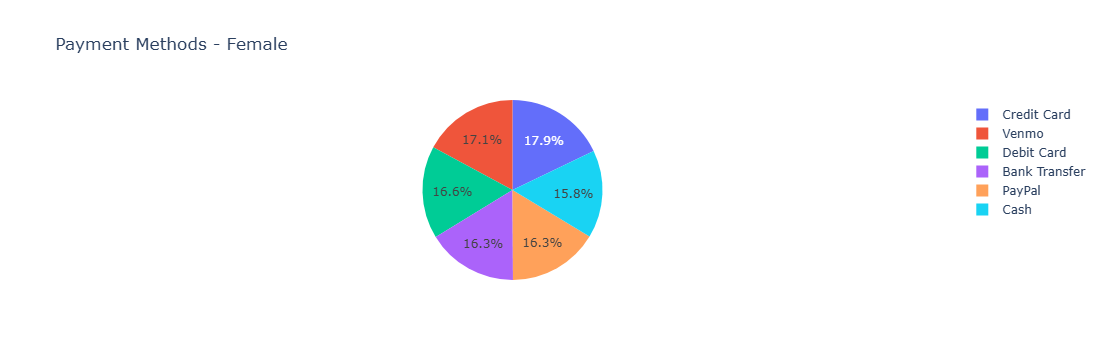

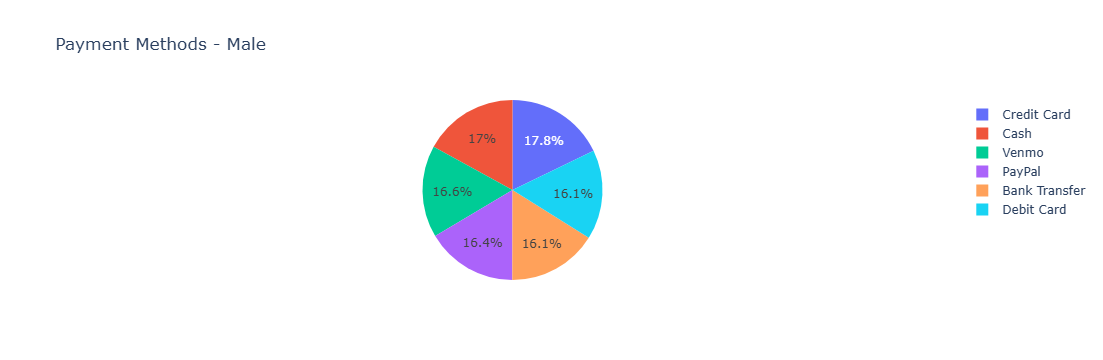

In [255]:
fig = px.pie(
    df[df["Gender"] == "Female"],
    names="Payment Method",
    title="Payment Methods - Female"
)
fig.show()
fig = px.pie(
    df[df["Gender"] == "Male"],
    names="Payment Method",
    title="Payment Methods - Male"
)
fig.show()


<Axes: xlabel='Item Purchased', ylabel='count'>

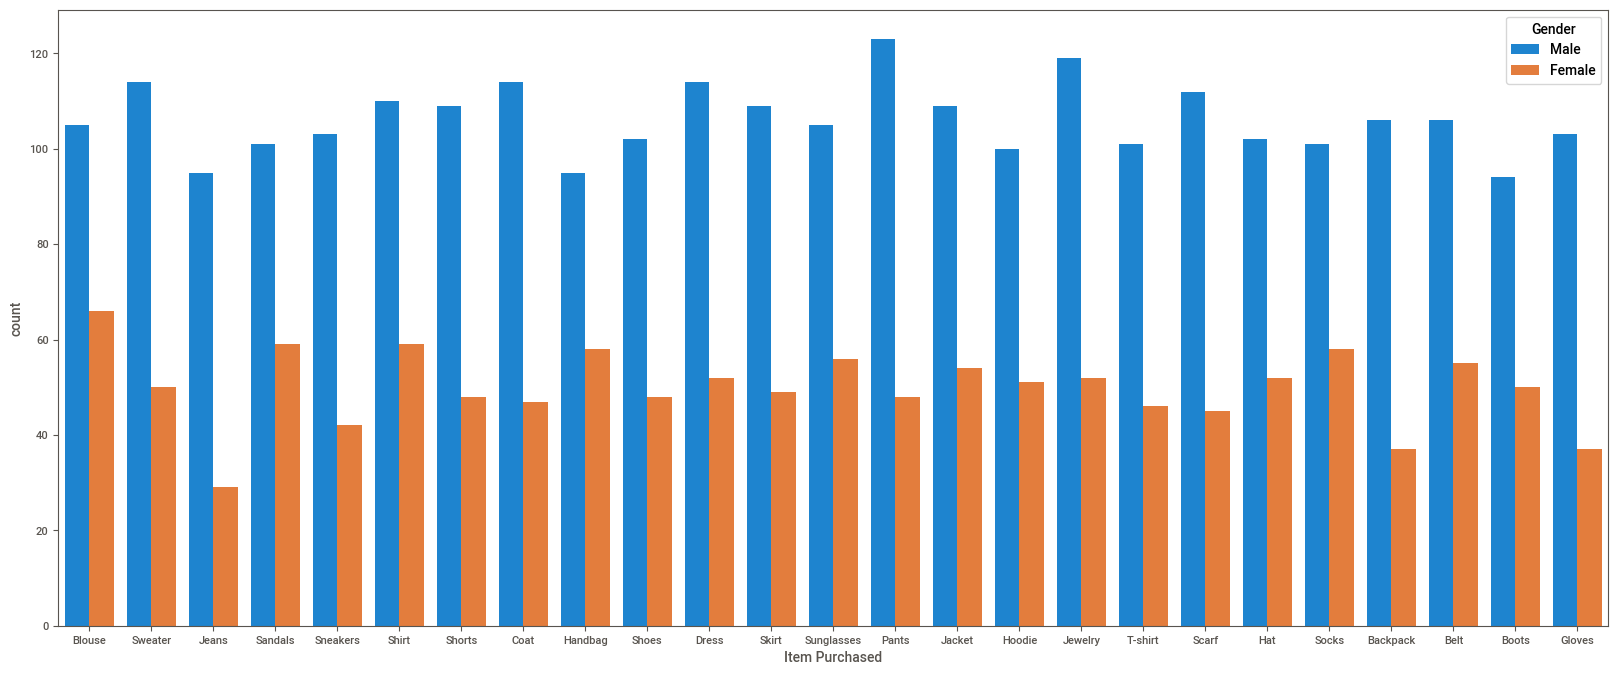

In [281]:
plt.figure(figsize=(20,8))
sns.countplot(df,x="Item Purchased",hue = "Gender")

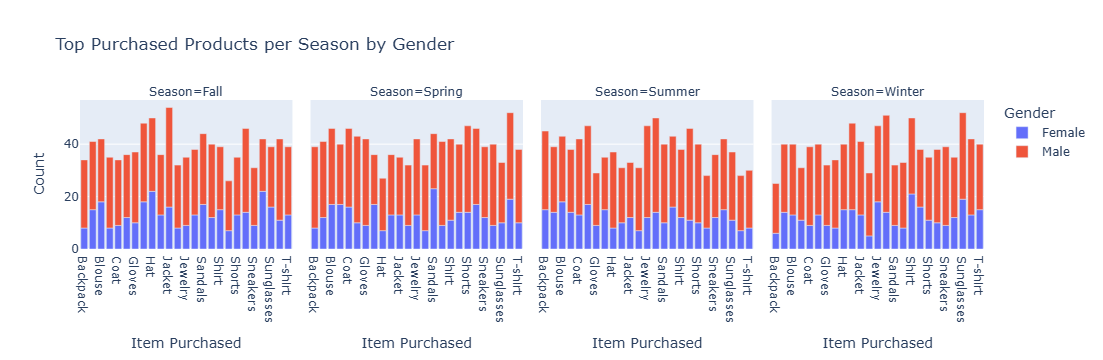

In [351]:

grouped = df.groupby(["Item Purchased", "Gender", "Season"]).size().reset_index(name="Count")

fig = px.bar(grouped,
             x="Item Purchased",
             y="Count",
             color="Gender",
             facet_col="Season",
             title="Top Purchased Products per Season by Gender")

fig.show()
